In [208]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import plotly.express as px
import string
import warnings
warnings.filterwarnings('ignore')

In [209]:
df = pd.read_csv('train.csv')

In [210]:
df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [211]:
df['tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [212]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [213]:
df.shape

(31962, 3)

In [214]:
df.duplicated().sum()

0

In [8]:
label_status = df['label'].value_counts()
transactions = label_status.index
quantatity = label_status.values
figure = px.pie(df,
               values=quantatity,
               names=transactions, hole=.60,
               title='Spam and Ham Status')
plt.show()


<Axes: xlabel='label'>

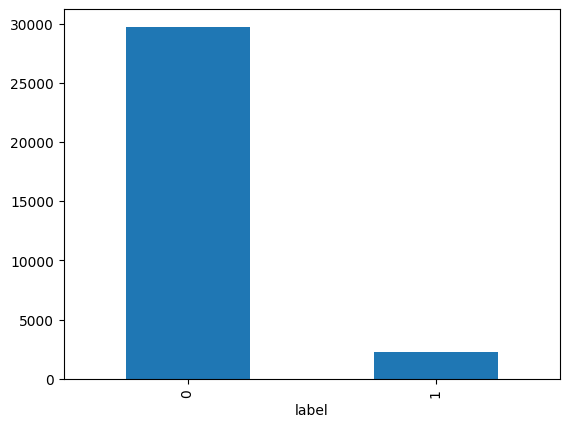

In [9]:
df['label'].value_counts().plot(kind='bar')

# creating wordcloud

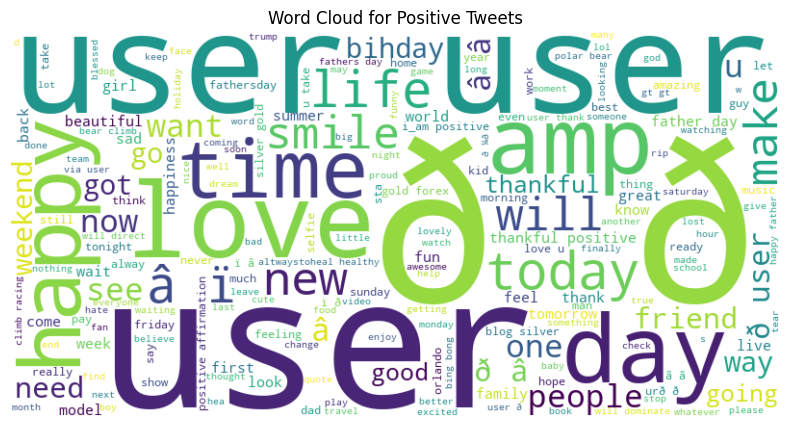

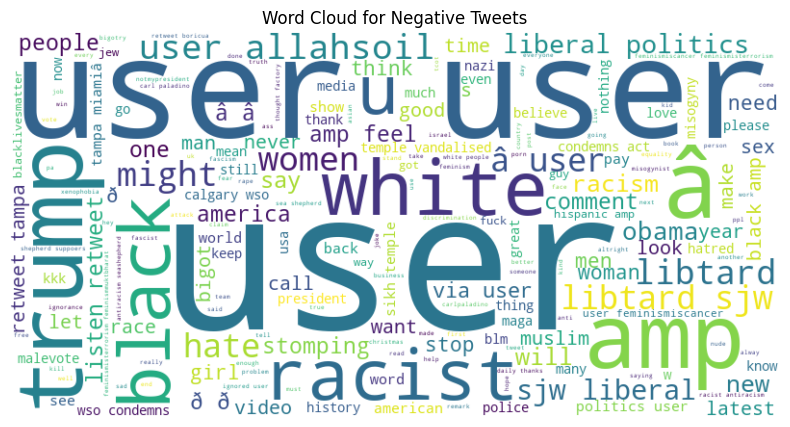

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordscloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordscloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Example usage
# Assuming you have a DataFrame named df with a 'tweet' column
# For positive label (0)
positive_tweets = ' '.join(df[df['label'] == 0]['tweet'])
generate_wordcloud(positive_tweets, 'Word Cloud for Positive Tweets')

# For negative label (1)
negative_tweets = ' '.join(df[df['label'] == 1]['tweet'])
generate_wordcloud(negative_tweets, 'Word Cloud for Negative Tweets')


In [215]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ghost
[nltk_data]     Codm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [216]:
stopword = set(stopwords.words('english'))

In [217]:
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [218]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [219]:
def Text_prerocessing(text):
    remove = [char for char in text if char not in string.punctuation]
    clean_word = ''.join(remove)
    text = ([word for word in clean_word.split() if word.lower() not in stopword])
    return text

In [220]:
df['clean_tweet'] = df['tweet'].apply(Text_prerocessing)

In [221]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[user, father, dysfunctional, selfish, drags, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, urð±, ðð..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"


In [222]:
df['clean_tweet'][3]

['model',
 'love',
 'u',
 'take',
 'u',
 'time',
 'urð\x9f\x93±',
 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91',
 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦']

# removing special character

In [28]:
import re
# Define a lambda function to remove special characters and emojis
remove_special_chars = lambda lst: [''.join(re.sub(r'[^\w\s]', '', s) for s in inner_lst) for inner_lst in lst]


# Apply the lambda function to the 'tweet' column and create a new column 'clean_tweet'
df['clean_tweet'] = df['clean_tweet'].apply(remove_special_chars)

In [223]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[user, father, dysfunctional, selfish, drags, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, urð±, ðð..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"


In [224]:
df['clean_tweet'][0]

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run']

Lemmatization

In [225]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to C:\Users\Ghost
[nltk_data]     Codm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
lemmataizatin = WordNetLemmatizer()

In [226]:
def Text_limitaize(text):
    limmitiz_text = ''.join([lemmataizatin.lemmatize(word.lower()) for word in text])
    return limmitiz_text

In [37]:
df['clean_text1'] = df['clean_tweet'].apply(Text_limitaize)

In [38]:
df.head()

,id,label,tweet,clean_tweet,clean_text1
0,1,0,@user when a father is dysfunctional and is s...,"[user, father, dysfunctional, selfish, drags, ...",userfatherdysfunctionalselfishdragkiddysfuncti...
1,2,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, lyft, credit, cant, use, ...",useruserthankslyftcreditcantusecausedontofferw...
2,3,0,bihday your majesty,"[bihday, majesty]",bihdaymajesty
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, urð, ðððð, ððð]",modelloveutakeutimeurðððððððð
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]",factsguidesocietymotivation


# Removing special character

In [227]:
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

In [228]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda tweets: [clean_text(tweet) for tweet in tweets])


In [229]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[user, father, dysfunctional, selfish, drags, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, ur, , ]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"


In [231]:
# df[['clean_tweet','clean_text1']]

# ploting histplot 

Calculating tweet lengths:   0%|          | 0/31962 [00:00<?, ?it/s]

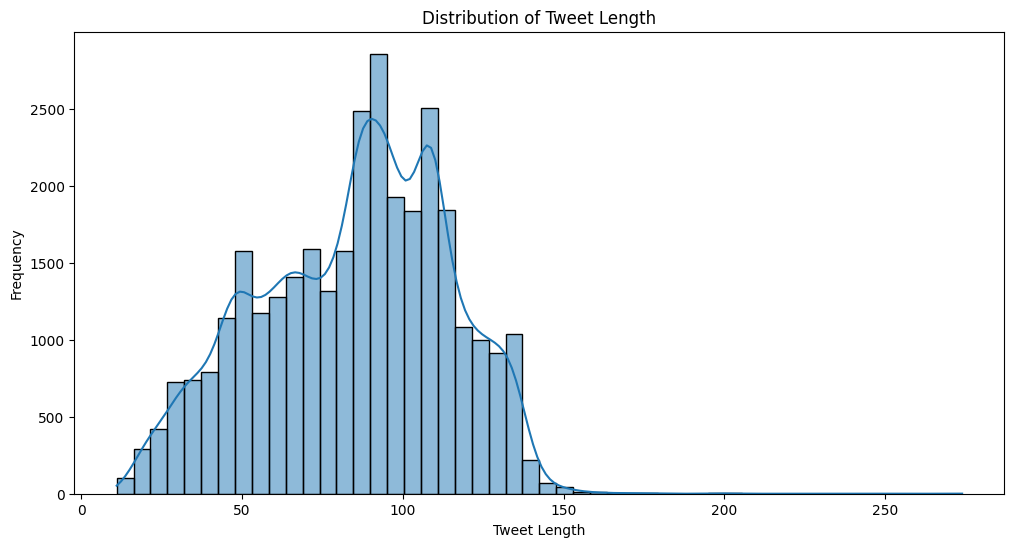

In [51]:
plt.figure(figsize=(12, 6))

# Use tqdm on the iterable (in this case, the Series 'df['tweet']')
df['tweet_length'] = list(tqdm(df['tweet'].apply(len), desc="Calculating tweet lengths"))

sns.histplot(data=df, x='tweet_length', bins=50, kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [232]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[user, father, dysfunctional, selfish, drags, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, lyft, credit, cant, use, ..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, ur, , ]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"


In [233]:
#making this column into lower()
df['clean_tweet'] = [' '.join(inner_list) for inner_list in df['clean_tweet']]


In [234]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


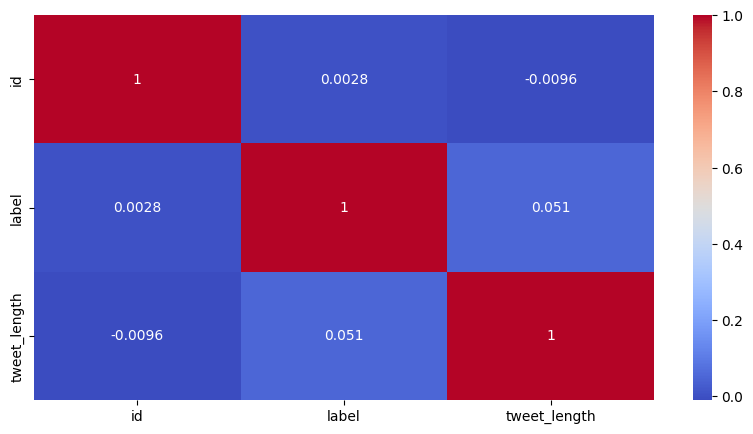

In [64]:
#checking corr relation between label and tweet_lenth column
num = df.select_dtypes(include='number')
cor = num.corr()

plt.figure(figsize=(10, 5))  # Corrected the syntax error in 'figsize'

sns.heatmap(cor, cmap='coolwarm', annot=True)
plt.show()

In [235]:
x = df['clean_tweet']
y = df['label']

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(x)

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import r2_score,accuracy_score,precision_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [238]:
xtrian,xtest,ytrian,ytest = train_test_split(X,y,test_size=.2,random_state=42)

In [239]:
model = LogisticRegression(solver='saga')
pipe = Pipeline([
    ('model',model)
])
pipe.fit(xtrian,ytrian)
y_pred = pipe.predict(xtest)
print('r2 score', r2_score(ytest,y_pred))
print('accuracyl',accuracy_score(ytest,y_pred))
print('precision score',precision_score(ytest,y_pred))

r2 score 0.16405813675168213
accuracyl 0.9446269357109338
precision score 0.9322033898305084


In [72]:
model1 = XGBClassifier()
pipe1 = Pipeline([
    ('model',model1)
])
pipe1.fit(xtrian,ytrian)
y_pred = pipe1.predict(xtest)
print('r2 score', r2_score(ytest,y_pred))
print('accuracyl',accuracy_score(ytest,y_pred))
print('precision score',precision_score(ytest,y_pred))

r2 score 0.2467077559993972
accuracyl 0.9501016737056155
precision score 0.8099547511312217


In [74]:
model2 = CatBoostClassifier()
pipe2 = Pipeline([
    ('model',model2)
])
pipe2.fit(xtrian,ytrian)
y_pred = pipe2.predict(xtest)
print('r2 score', r2_score(ytest,y_pred))
print('accuracyl',accuracy_score(ytest,y_pred))
print('precision score',precision_score(ytest,y_pred))

Learning rate set to 0.041118
0:	learn: 0.6485782	total: 648ms	remaining: 10m 47s
1:	learn: 0.6071558	total: 1.07s	remaining: 8m 53s
2:	learn: 0.5710567	total: 1.47s	remaining: 8m 8s
3:	learn: 0.5381305	total: 1.86s	remaining: 7m 44s
4:	learn: 0.5084476	total: 2.32s	remaining: 7m 41s
5:	learn: 0.4811081	total: 2.73s	remaining: 7m 33s
6:	learn: 0.4570115	total: 3.15s	remaining: 7m 27s
7:	learn: 0.4348634	total: 3.56s	remaining: 7m 20s
8:	learn: 0.4155100	total: 3.96s	remaining: 7m 15s
9:	learn: 0.3978050	total: 4.36s	remaining: 7m 11s
10:	learn: 0.3807893	total: 4.76s	remaining: 7m 7s
11:	learn: 0.3659462	total: 5.17s	remaining: 7m 5s
12:	learn: 0.3518311	total: 5.57s	remaining: 7m 3s
13:	learn: 0.3390598	total: 5.97s	remaining: 7m
14:	learn: 0.3276784	total: 6.37s	remaining: 6m 58s
15:	learn: 0.3173343	total: 6.91s	remaining: 7m 4s
16:	learn: 0.3080106	total: 7.33s	remaining: 7m 4s
17:	learn: 0.2993955	total: 7.76s	remaining: 7m 3s
18:	learn: 0.2911155	total: 8.31s	remaining: 7m 9s
19:

158:	learn: 0.1716546	total: 1m 12s	remaining: 6m 20s
159:	learn: 0.1714830	total: 1m 12s	remaining: 6m 20s
160:	learn: 0.1713160	total: 1m 12s	remaining: 6m 19s
161:	learn: 0.1711505	total: 1m 13s	remaining: 6m 18s
162:	learn: 0.1709917	total: 1m 13s	remaining: 6m 18s
163:	learn: 0.1708215	total: 1m 14s	remaining: 6m 17s
164:	learn: 0.1706708	total: 1m 14s	remaining: 6m 17s
165:	learn: 0.1705000	total: 1m 14s	remaining: 6m 16s
166:	learn: 0.1703565	total: 1m 15s	remaining: 6m 15s
167:	learn: 0.1701123	total: 1m 15s	remaining: 6m 15s
168:	learn: 0.1699533	total: 1m 16s	remaining: 6m 15s
169:	learn: 0.1698055	total: 1m 16s	remaining: 6m 14s
170:	learn: 0.1696264	total: 1m 17s	remaining: 6m 14s
171:	learn: 0.1694201	total: 1m 17s	remaining: 6m 13s
172:	learn: 0.1692745	total: 1m 18s	remaining: 6m 12s
173:	learn: 0.1691305	total: 1m 18s	remaining: 6m 12s
174:	learn: 0.1687676	total: 1m 18s	remaining: 6m 11s
175:	learn: 0.1686162	total: 1m 19s	remaining: 6m 11s
176:	learn: 0.1682580	total:

311:	learn: 0.1499106	total: 2m 19s	remaining: 5m 6s
312:	learn: 0.1498007	total: 2m 19s	remaining: 5m 6s
313:	learn: 0.1496378	total: 2m 20s	remaining: 5m 5s
314:	learn: 0.1495554	total: 2m 20s	remaining: 5m 5s
315:	learn: 0.1494184	total: 2m 20s	remaining: 5m 4s
316:	learn: 0.1492747	total: 2m 21s	remaining: 5m 4s
317:	learn: 0.1492011	total: 2m 21s	remaining: 5m 3s
318:	learn: 0.1491094	total: 2m 22s	remaining: 5m 3s
319:	learn: 0.1489558	total: 2m 22s	remaining: 5m 3s
320:	learn: 0.1487063	total: 2m 23s	remaining: 5m 2s
321:	learn: 0.1485810	total: 2m 23s	remaining: 5m 2s
322:	learn: 0.1485025	total: 2m 24s	remaining: 5m 1s
323:	learn: 0.1484208	total: 2m 24s	remaining: 5m 1s
324:	learn: 0.1483408	total: 2m 24s	remaining: 5m
325:	learn: 0.1480915	total: 2m 25s	remaining: 5m
326:	learn: 0.1479641	total: 2m 25s	remaining: 4m 59s
327:	learn: 0.1478453	total: 2m 25s	remaining: 4m 59s
328:	learn: 0.1477448	total: 2m 26s	remaining: 4m 58s
329:	learn: 0.1475989	total: 2m 26s	remaining: 4m

464:	learn: 0.1365688	total: 3m 29s	remaining: 4m 1s
465:	learn: 0.1365135	total: 3m 30s	remaining: 4m
466:	learn: 0.1364624	total: 3m 30s	remaining: 4m
467:	learn: 0.1364020	total: 3m 31s	remaining: 4m
468:	learn: 0.1363514	total: 3m 31s	remaining: 3m 59s
469:	learn: 0.1362659	total: 3m 32s	remaining: 3m 59s
470:	learn: 0.1361686	total: 3m 32s	remaining: 3m 58s
471:	learn: 0.1361197	total: 3m 32s	remaining: 3m 58s
472:	learn: 0.1360122	total: 3m 33s	remaining: 3m 57s
473:	learn: 0.1359589	total: 3m 33s	remaining: 3m 57s
474:	learn: 0.1359089	total: 3m 34s	remaining: 3m 56s
475:	learn: 0.1358541	total: 3m 34s	remaining: 3m 56s
476:	learn: 0.1357991	total: 3m 35s	remaining: 3m 55s
477:	learn: 0.1357465	total: 3m 35s	remaining: 3m 55s
478:	learn: 0.1356600	total: 3m 35s	remaining: 3m 54s
479:	learn: 0.1355797	total: 3m 36s	remaining: 3m 54s
480:	learn: 0.1354407	total: 3m 36s	remaining: 3m 53s
481:	learn: 0.1353670	total: 3m 37s	remaining: 3m 53s
482:	learn: 0.1353160	total: 3m 37s	remai

618:	learn: 0.1262684	total: 4m 39s	remaining: 2m 52s
619:	learn: 0.1262274	total: 4m 40s	remaining: 2m 51s
620:	learn: 0.1261891	total: 4m 40s	remaining: 2m 51s
621:	learn: 0.1261114	total: 4m 41s	remaining: 2m 50s
622:	learn: 0.1260733	total: 4m 41s	remaining: 2m 50s
623:	learn: 0.1260145	total: 4m 42s	remaining: 2m 50s
624:	learn: 0.1259754	total: 4m 43s	remaining: 2m 50s
625:	learn: 0.1259345	total: 4m 43s	remaining: 2m 49s
626:	learn: 0.1258651	total: 4m 44s	remaining: 2m 49s
627:	learn: 0.1258242	total: 4m 45s	remaining: 2m 48s
628:	learn: 0.1257841	total: 4m 45s	remaining: 2m 48s
629:	learn: 0.1257376	total: 4m 46s	remaining: 2m 48s
630:	learn: 0.1256976	total: 4m 46s	remaining: 2m 47s
631:	learn: 0.1256293	total: 4m 47s	remaining: 2m 47s
632:	learn: 0.1255705	total: 4m 47s	remaining: 2m 46s
633:	learn: 0.1255322	total: 4m 47s	remaining: 2m 46s
634:	learn: 0.1254448	total: 4m 48s	remaining: 2m 45s
635:	learn: 0.1253984	total: 4m 48s	remaining: 2m 45s
636:	learn: 0.1253579	total:

771:	learn: 0.1179831	total: 5m 49s	remaining: 1m 43s
772:	learn: 0.1179105	total: 5m 50s	remaining: 1m 42s
773:	learn: 0.1178803	total: 5m 50s	remaining: 1m 42s
774:	learn: 0.1178336	total: 5m 50s	remaining: 1m 41s
775:	learn: 0.1177580	total: 5m 51s	remaining: 1m 41s
776:	learn: 0.1176413	total: 5m 51s	remaining: 1m 40s
777:	learn: 0.1176094	total: 5m 52s	remaining: 1m 40s
778:	learn: 0.1175658	total: 5m 52s	remaining: 1m 40s
779:	learn: 0.1175015	total: 5m 53s	remaining: 1m 39s
780:	learn: 0.1173893	total: 5m 53s	remaining: 1m 39s
781:	learn: 0.1173193	total: 5m 53s	remaining: 1m 38s
782:	learn: 0.1172881	total: 5m 54s	remaining: 1m 38s
783:	learn: 0.1172348	total: 5m 54s	remaining: 1m 37s
784:	learn: 0.1172010	total: 5m 55s	remaining: 1m 37s
785:	learn: 0.1171440	total: 5m 55s	remaining: 1m 36s
786:	learn: 0.1170815	total: 5m 56s	remaining: 1m 36s
787:	learn: 0.1170010	total: 5m 56s	remaining: 1m 35s
788:	learn: 0.1169228	total: 5m 56s	remaining: 1m 35s
789:	learn: 0.1168663	total:

926:	learn: 0.1114722	total: 6m 58s	remaining: 33s
927:	learn: 0.1114493	total: 6m 58s	remaining: 32.5s
928:	learn: 0.1114252	total: 6m 59s	remaining: 32s
929:	learn: 0.1114010	total: 6m 59s	remaining: 31.6s
930:	learn: 0.1113778	total: 7m	remaining: 31.1s
931:	learn: 0.1113479	total: 7m	remaining: 30.7s
932:	learn: 0.1112935	total: 7m	remaining: 30.2s
933:	learn: 0.1112694	total: 7m 1s	remaining: 29.8s
934:	learn: 0.1112384	total: 7m 1s	remaining: 29.3s
935:	learn: 0.1112107	total: 7m 2s	remaining: 28.9s
936:	learn: 0.1111860	total: 7m 2s	remaining: 28.4s
937:	learn: 0.1111271	total: 7m 3s	remaining: 28s
938:	learn: 0.1111022	total: 7m 3s	remaining: 27.5s
939:	learn: 0.1110789	total: 7m 4s	remaining: 27.1s
940:	learn: 0.1110553	total: 7m 4s	remaining: 26.6s
941:	learn: 0.1110327	total: 7m 4s	remaining: 26.2s
942:	learn: 0.1110088	total: 7m 5s	remaining: 25.7s
943:	learn: 0.1109850	total: 7m 5s	remaining: 25.3s
944:	learn: 0.1109548	total: 7m 6s	remaining: 24.8s
945:	learn: 0.1109246	t

In [240]:
model9 = MultinomialNB()
pipe9 = Pipeline([
    ('model',model9)
])
pipe9.fit(xtrian,ytrian)
y_pred = pipe9.predict(xtest)
print('r2 score', r2_score(ytest,y_pred))
print('accuracyl',accuracy_score(ytest,y_pred))
print('precision score',precision_score(ytest,y_pred))

r2 score 0.08140851750396705
accuracyl 0.9391521977162521
precision score 1.0


In [126]:
model4 = BernoulliNB()
pipe4 = Pipeline([
    ('model',model4)
])
pipe4.fit(xtrian,ytrian)
y_pred = pipe4.predict(xtest)
print('r2 score', r2_score(ytest,y_pred))
print('accuracyl',accuracy_score(ytest,y_pred))
print('precision score',precision_score(ytest,y_pred))

r2 score 0.04834866980488106
accuracyl 0.9369623025183795
precision score 0.9818181818181818


In [79]:
model5 = RandomForestClassifier()
pipe5 = Pipeline([
    ('model',model5)
])
pipe5.fit(xtrian,ytrian)
y_pred = pipe5.predict(xtest)
print('r2 score', r2_score(ytest,y_pred))
print('accuracyl',accuracy_score(ytest,y_pred))
print('precision score',precision_score(ytest,y_pred))

r2 score 0.36950147602457384
accuracyl 0.9582355701548568
precision score 0.9237668161434978


In [80]:
model6 = GradientBoostingClassifier()
pipe6 = Pipeline([
    ('model',model6)
])
pipe6.fit(xtrian,ytrian)
y_pred = pipe6.predict(xtest)
print('r2 score', r2_score(ytest,y_pred))
print('accuracyl',accuracy_score(ytest,y_pred))
print('precision score',precision_score(ytest,y_pred))

r2 score 0.17822664290843326
accuracyl 0.9455654622243078
precision score 0.8648648648648649


In [82]:
scores = []
for i in range(1000):
    Xtrian,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=.2,random_state=i)
    pipe3.fit(Xtrian,Ytrain)
    y_pred1 = pipe3.predict(Xtest)
    print(scores.append(accuracy_score(Ytest,y_pred1)))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


# Apply voting classifier on MultinomialNB

In [144]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming xtrain, ytrain, xtest, ytest are your training and testing data

# Create MultinomialNB model
model3 = MultinomialNB()
tfidf_vectorizer = TfidfVectorizer()

# Create a pipeline with TfidfVectorizer and MultinomialNB
pipe3 = Pipeline([
#     ('tfidf', tfidf_vectorizer),
    ('model', model3)
])

# Fit the pipeline on the training data
pipe3.fit(xtrian, ytrian)

# Get predictions on the test set
y_pred_nb = pipe3.predict(xtest)

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('nb', pipe3)],
    voting='hard'  # You can use 'soft' if your models have predict_proba method
)

# Fit the Voting Classifier on the training data
voting_classifier.fit(xtrian, ytrian)

# Get predictions on the test set
y_pred_voting = voting_classifier.predict(xtest)

# Evaluate individual model (MultinomialNB)
print('MultinomialNB Metrics:')
print('Accuracy:', accuracy_score(ytest, y_pred_nb))
print('Precision:', precision_score(ytest, y_pred_nb))

# Evaluate the Voting Classifier
print('\nVoting Classifier Metrics:')
print('Accuracy:', accuracy_score(ytest, y_pred_voting))
print('Precision:', precision_score(ytest, y_pred_voting))


MultinomialNB Metrics:
Accuracy: 0.9391521977162521
Precision: 1.0

Voting Classifier Metrics:
Accuracy: 0.9391521977162521
Precision: 1.0


# Visualizing the performance

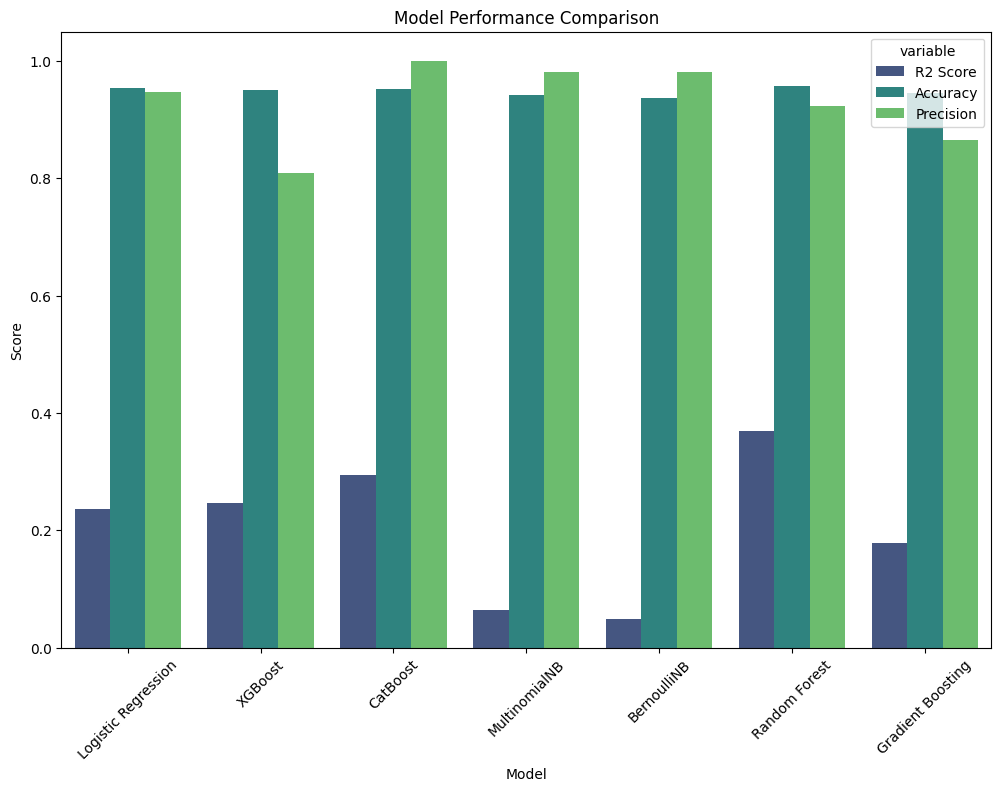

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the r2 scores, accuracy scores, and precision scores stored in lists
models = ['Logistic Regression', 'XGBoost', 'CatBoost', 'MultinomialNB', 'BernoulliNB', 'Random Forest', 'Gradient Boosting']
r2_scores = [0.2363831820353559, 0.2467077559993972, 0.29393610985523433, 0.06489394417284355, 0.04834866980488106, 0.36950147602457384, 0.17822664290843326]
accuracy_scores = [0.9538557797591115, 0.9501016737056155, 0.9532300954168622, 0.9419677772563742, 0.9369623025183795, 0.9582355701548568, 0.9455654622243078]
precision_scores = [0.946969696969697, 0.8099547511312217, 1.0, 0.9821428571428571, 0.9818181818181818, 0.9237668161434978, 0.8648648648648649]

# Create a DataFrame for easy plotting
performance_df = pd.DataFrame({'Model': models, 'R2 Score': r2_scores, 'Accuracy': accuracy_scores, 'Precision': precision_scores})

# Melt the DataFrame for Seaborn plotting
melted_df = pd.melt(performance_df, id_vars=['Model'], value_vars=['R2 Score', 'Accuracy', 'Precision'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='value', hue='variable', data=melted_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()


In [135]:
# multinomialNB has a grate precision score so i am taking this model 
import pickle 
with open('MUl_model.pkl','wb') as model_file:
    pickle.dump(pipe3,model_file)